# MCCoder Metrics for evaluation

## MotionLogData

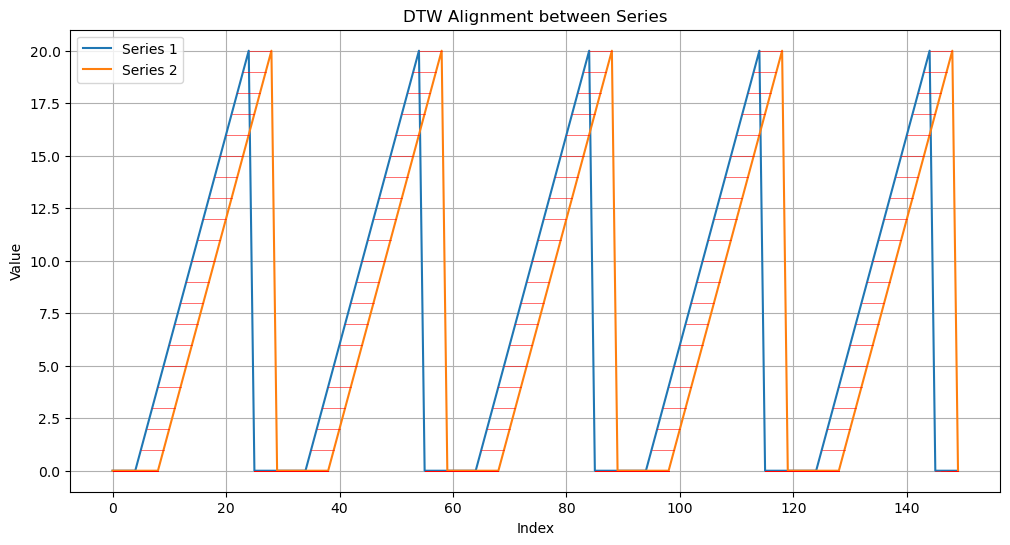

DTW Distance: 0.0
Normalized DTW Distance: 0.0


In [62]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

# Create two time series with data 10 times larger
series1 = np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 5)
series2 = np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0],5)

# Pad the shorter series to match the length of the longer series
if len(series1) < len(series2):
    padding = np.full(len(series2) - len(series1), series1[-1])
    series1 = np.concatenate([series1, padding])
elif len(series2) < len(series1):
    padding = np.full(len(series1) - len(series2), series2[-1])
    series2 = np.concatenate([series2, padding])

# Calculate the DTW distance and the path
distance, path = fastdtw(series1, series2)

# Normalize the DTW distance to a range of 0 to 1
max_possible_distance = np.sum(np.abs(series1 - series2))
normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0

# Convert the path to a NumPy array for easier handling
path = np.array(path)

# Plot the series
plt.figure(figsize=(12, 6))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')

# Plot the connections between matched points with thinner red lines
for (map1, map2) in path:
    plt.plot([map1, map2], [series1[map1], series2[map2]], 'r', linewidth=0.4)

plt.title('DTW Alignment between Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("DTW Distance:", distance)
print("Normalized DTW Distance:", normalized_distance)


Length of series1: 110
Length of series2: 130
Length of series1: 130
Length of series2: 130


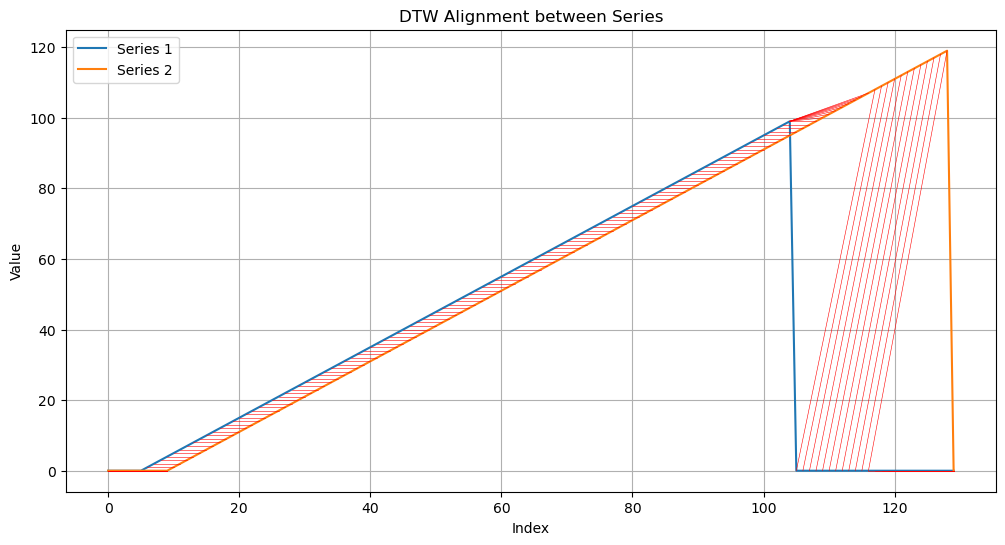

DTW Distance: 1398.0
Normalized DTW Distance: 0.4707070707070707


In [72]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

def print_series_info(series1, series2):
    print(f"Length of series1: {len(series1)}")
    print(f"Length of series2: {len(series2)}")

# Create two time series with data 6 times larger
series1 = np.concatenate([np.zeros(5), np.arange(100), np.zeros(5)])
series2 = np.concatenate([np.zeros(9), np.arange(120), np.zeros(1)])

print_series_info(series1, series2)

# Pad the shorter series to match the length of the longer series
if len(series1) < len(series2):
    padding = np.full(len(series2) - len(series1), series1[-1])
    series1 = np.concatenate([series1, padding])
elif len(series2) < len(series1):
    padding = np.full(len(series1) - len(series2), series2[-1])
    series2 = np.concatenate([series2, padding])

print_series_info(series1, series2)

# Calculate the DTW distance and the path
distance, path = fastdtw(series1, series2)

# Normalize the DTW distance to a range of 0 to 1
max_possible_distance = np.sum(np.abs(series1 - series2))
normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0

# Convert the path to a NumPy array for easier handling
path = np.array(path)

# Plot the series
plt.figure(figsize=(12, 6))
plt.plot(series1, label='Series 1')
plt.plot(series2, label='Series 2')

# Plot the connections between matched points with thinner red lines
for (map1, map2) in path:
    plt.plot([map1, map2], [series1[map1], series2[map2]], 'r', linewidth=0.4)

plt.title('DTW Alignment between Series')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

print("DTW Distance:", distance)
print("Normalized DTW Distance:", normalized_distance)


DTW Distance for series pair 0: 0.2
Normalized DTW Distance for series pair 0: 1.0
DTW Distance for series pair 1: 0.1
Normalized DTW Distance for series pair 1: 0.0006752194463200541
Total DTW Distance for all pairs: 0.30000000000000004
Normalized Total DTW Distance for all pairs: 0.002022926500337155
Series pair 0:
Series 1: [ 0  0  0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20  0  0  0  0  0]
Series 2: [ 0.   0.   0.   0.   0.2  1.   2.   3.   4.   5.   6.   7.   8.   9.
 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.   0.   0.   0.
  0.   0. ]


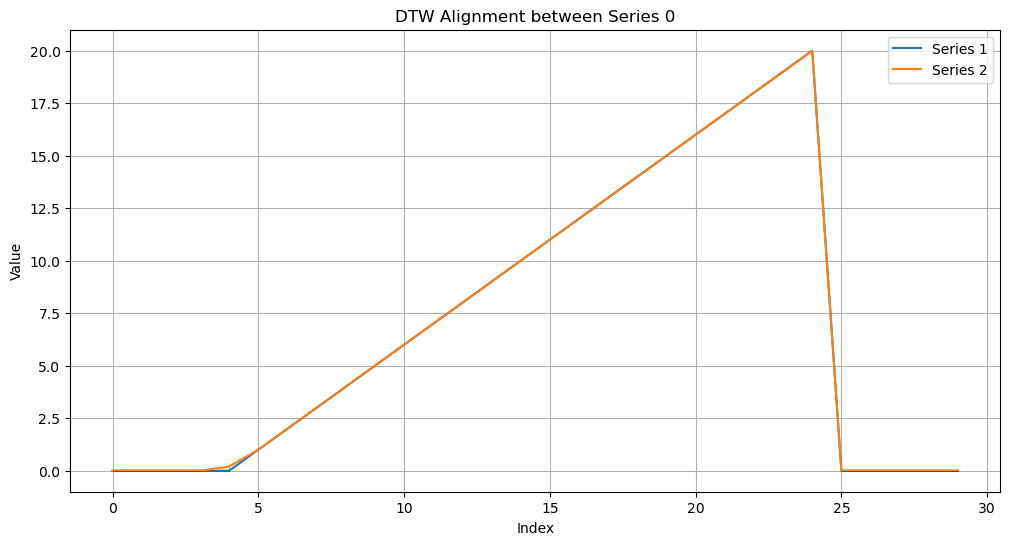

Series pair 1:
Series 1: [ 0.   0.   0.   0.   0.   1.   2.   3.   4.   5.   6.   7.   8.   9.
 10.  11.  12.  13.  14.  15.  16.  17.  18.  19.  20.   0.   0.   0.
  0.   0.1]
Series 2: [ 0  0  0  0  0  0  0  0  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20  0]


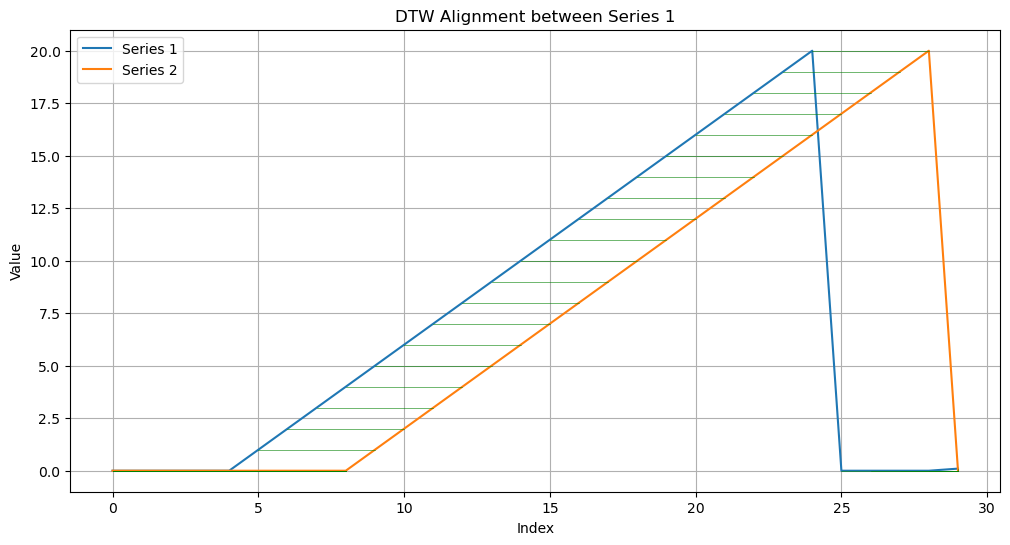

Individual DTW Distances: [0.2, 0.1]
Individual Normalized DTW Distances: [1.0, 0.0006752194463200541]


In [19]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

def compute_padded_dtw(series_a, series_b):
    # Pad the shorter series to match the length of the longer series
    if len(series_a) < len(series_b):
        padding = np.full(len(series_b) - len(series_a), series_a[-1])
        series_a = np.concatenate([series_a, padding])
    elif len(series_b) < len(series_a):
        padding = np.full(len(series_a) - len(series_b), series_b[-1])
        series_b = np.concatenate([series_b, padding])
    
    # Calculate the DTW distance
    distance, path = fastdtw(series_a, series_b)
    
    return distance, path, series_a, series_b

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    # Plot the connections between matched points with thinner green lines
    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define your series groups
series_groups = [
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 1),
     np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 1)),
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0.1], 1),
     np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0], 1))
]

# Compute DTW distances for each pair and aggregate them
total_distance = 0
all_distances = []
normalized_distances = []
paths = []
padded_series = []

for i, (series_a, series_b) in enumerate(series_groups):
    distance, path, padded_series_a, padded_series_b = compute_padded_dtw(series_a, series_b)
    total_distance += distance
    all_distances.append(distance)
    paths.append(path)
    padded_series.append((padded_series_a, padded_series_b))
    print(f"DTW Distance for series pair {i}: {distance}")
    
    # Calculate normalized distance for each pair
    max_possible_distance = np.sum(np.abs(padded_series_a - padded_series_b))
    normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0
    normalized_distances.append(normalized_distance)
    print(f"Normalized DTW Distance for series pair {i}: {normalized_distance}")

print("Total DTW Distance for all pairs:", total_distance)

# Optionally, normalize the total distance using the padded series
overall_max_possible_distance = sum(np.sum(np.abs(series_a - series_b)) for series_a, series_b in padded_series)
normalized_total_distance = total_distance / overall_max_possible_distance if overall_max_possible_distance != 0 else 0
print("Normalized Total DTW Distance for all pairs:", normalized_total_distance)

# Plotting the series and DTW paths for each pair
for i, ((series_a, series_b), path) in enumerate(zip(padded_series, paths)):
    print(f"Series pair {i}:")
    print(f"Series 1: {series_a}")
    print(f"Series 2: {series_b}")
    plot_dtw_alignment(series_a, series_b, path, i)

print("Individual DTW Distances:", all_distances)
print("Individual Normalized DTW Distances:", normalized_distances)


### dtaidistance

DTW Distance for series pair 0: 4.47213595499958
Normalized DTW Distance for series pair 0: 0.0298142396999972
DTW Distance for series pair 1: 0.9
Normalized DTW Distance for series pair 1: 0.006044325050369375
Total DTW Distance for all pairs: 5.37213595499958
Normalized Total DTW Distance for all pairs: 0.017973020926729946


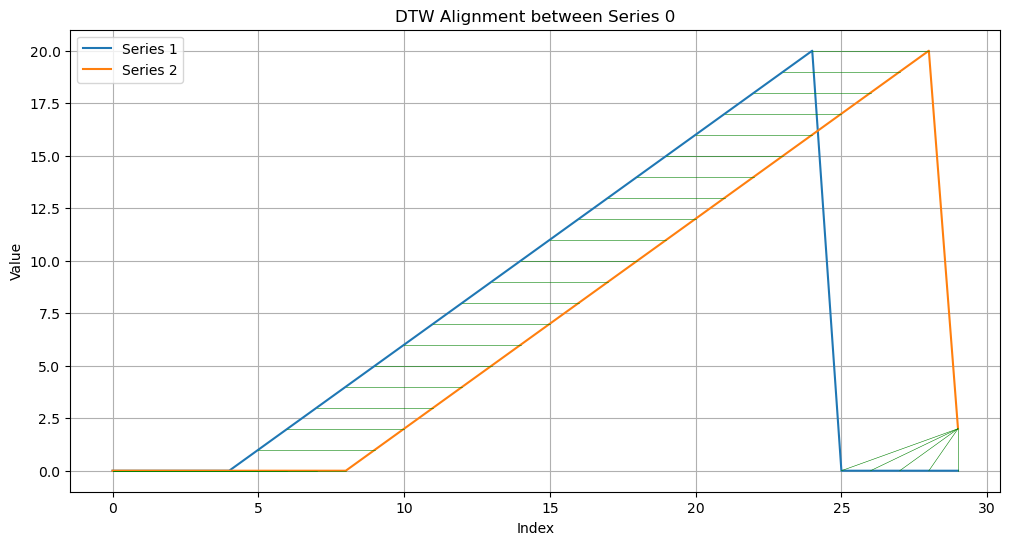

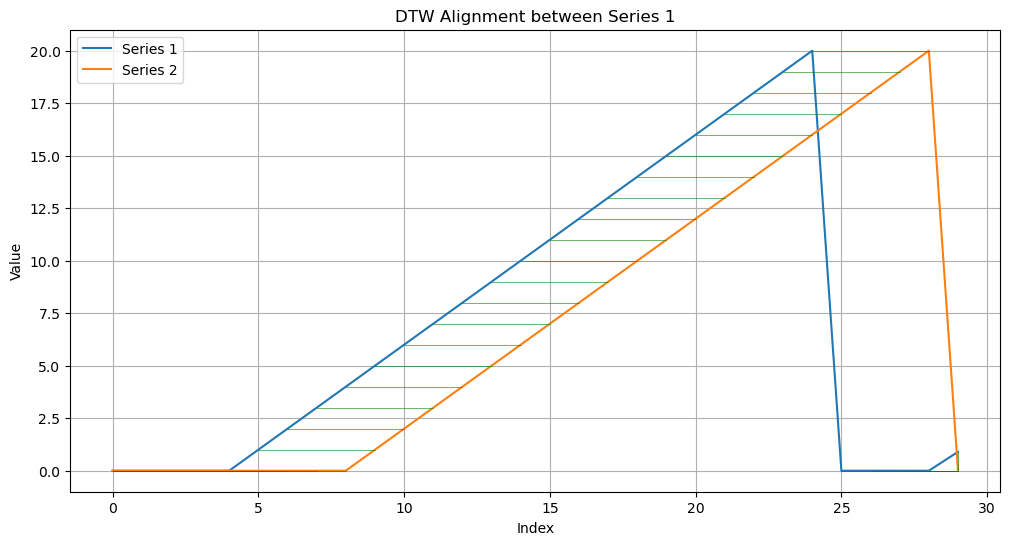

Individual DTW Distances: [4.47213595499958, 0.9]
Individual Normalized DTW Distances: [0.0298142396999972, 0.006044325050369375]


In [98]:
import numpy as np
import matplotlib.pyplot as plt
from dtaidistance import dtw

def compute_padded_dtw(series_a, series_b):
    # Pad the shorter series to match the length of the longer series
    if len(series_a) < len(series_b):
        padding = np.full(len(series_b) - len(series_a), series_a[-1])
        series_a = np.concatenate([series_a, padding])
    elif len(series_b) < len(series_a):
        padding = np.full(len(series_a) - len(series_b), series_b[-1])
        series_b = np.concatenate([series_b, padding])
    
    # Calculate the DTW distance and the path
    distance = dtw.distance(series_a, series_b)
    path = dtw.warping_path(series_a, series_b)
    
    return distance, path, series_a, series_b

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    # Plot the connections between matched points with thinner green lines
    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define your series groups
series_groups = [
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0], 1),
     np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 2], 1)),
    (np.tile([0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0, 0, 0, 0, 0.9], 1),
     np.tile([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 0], 1))
]

# Compute DTW distances for each pair and aggregate them
total_distance = 0
all_distances = []
normalized_distances = []
paths = []
padded_series = []

for i, (series_a, series_b) in enumerate(series_groups):
    distance, path, padded_series_a, padded_series_b = compute_padded_dtw(series_a, series_b)
    total_distance += distance
    all_distances.append(distance)
    paths.append(path)
    padded_series.append((padded_series_a, padded_series_b))
    print(f"DTW Distance for series pair {i}: {distance}")
    
    # Calculate normalized distance for each pair
    max_possible_distance = np.sum(np.abs(padded_series_a - padded_series_b))
    normalized_distance = distance / max_possible_distance if max_possible_distance != 0 else 0
    normalized_distances.append(normalized_distance)
    print(f"Normalized DTW Distance for series pair {i}: {normalized_distance}")

print("Total DTW Distance for all pairs:", total_distance)

# Optionally, normalize the total distance using the padded series
overall_max_possible_distance = sum(np.sum(np.abs(series_a - series_b)) for series_a, series_b in padded_series)
normalized_total_distance = total_distance / overall_max_possible_distance if overall_max_possible_distance != 0 else 0
print("Normalized Total DTW Distance for all pairs:", normalized_total_distance)

# Plotting the series and DTW paths for each pair
for i, ((series_a, series_b), path) in enumerate(zip(padded_series, paths)):
    plot_dtw_alignment(series_a, series_b, path, i)

print("Individual DTW Distances:", all_distances)
print("Individual Normalized DTW Distances:", normalized_distances)


## No padding and normalization (V1)

DTW Distance for series pair 0: 0.0
DTW Distance for series pair 1: 0.0
DTW Distance for series pair 2: 0.0
Total DTW Distance for all pairs: 0.0
Series pair 0:
Series 1: [ 0  1  2  3  4  5  6  7  8  9 10  0  0  0]
Series 2: [ 0  1  2  3  4  5  6  7  8  9 10  0]


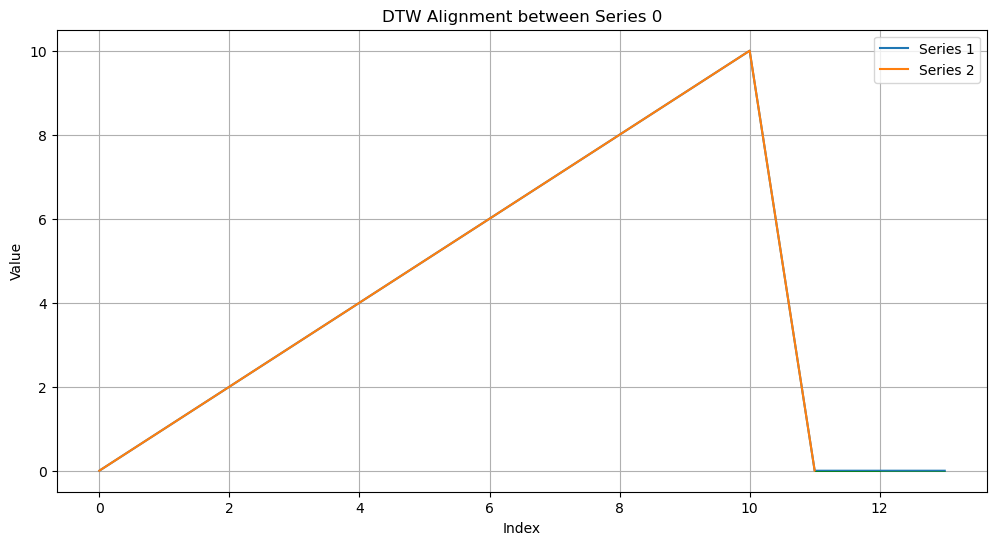

Series pair 1:
Series 1: [ 0  1  2  3  4  5  6  7  8  9 10  0  0  0]
Series 2: [ 0  1  2  3  4  5  6  7  8  9 10  0]


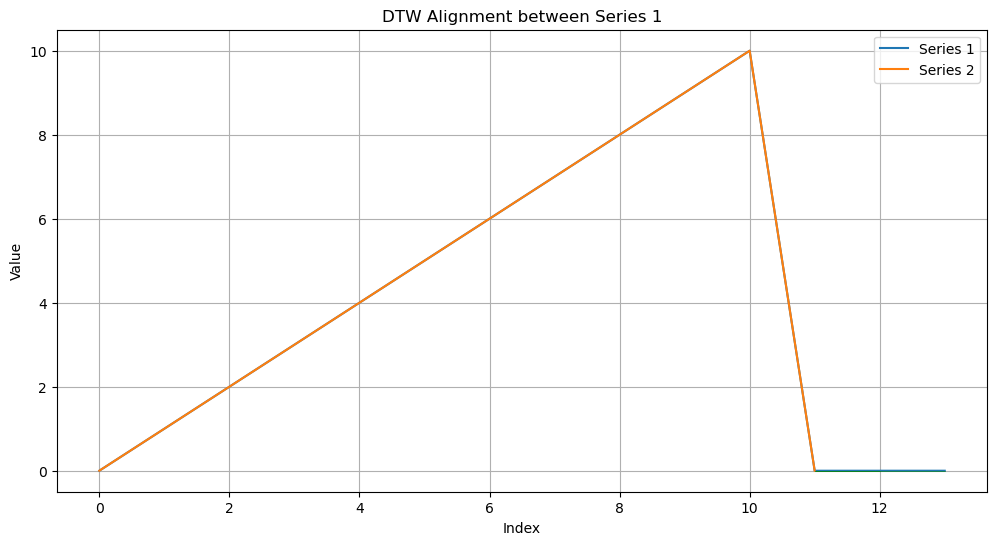

Series pair 2:
Series 1: [ 0  1  2  3  4  5  6  7  8  9 10  0  0  0]
Series 2: [ 0  1  2  3  4  5  6  7  8  9 10  0]


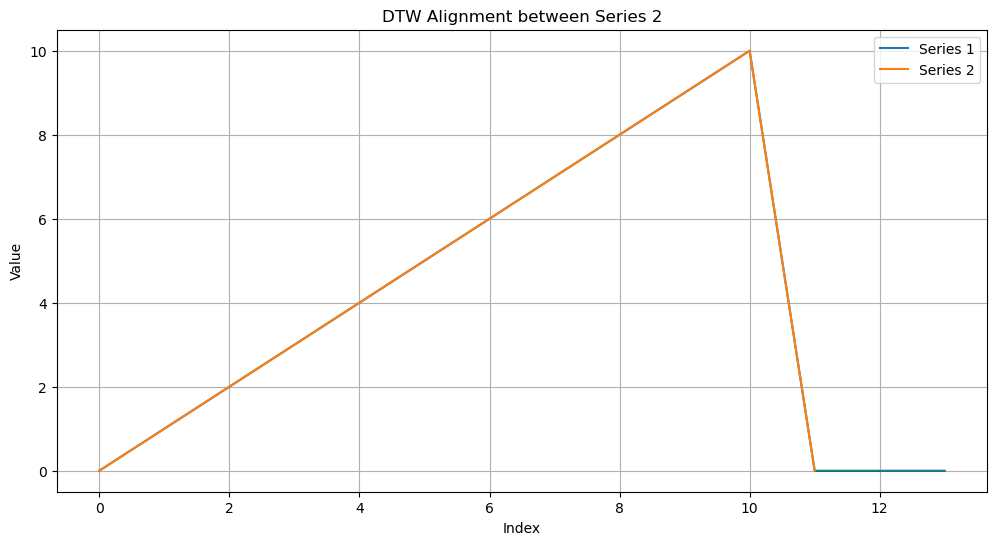

Individual DTW Distances: [0.0, 0.0, 0.0]
Total DTW Distance: 0.0
Endpoints Match: Yes


In [25]:
import numpy as np
import matplotlib.pyplot as plt
from fastdtw import fastdtw

def compute_dtw(series_a, series_b):
    # Calculate the DTW distance
    distance, path = fastdtw(series_a, series_b)
    return distance, path

def plot_dtw_alignment(series_a, series_b, path, index):
    plt.figure(figsize=(12, 6))
    plt.plot(series_a, label='Series 1')
    plt.plot(series_b, label='Series 2')

    # Plot the connections between matched points with thinner green lines
    for (map1, map2) in path:
        plt.plot([map1, map2], [series_a[map1], series_b[map2]], 'g', linewidth=0.4)

    plt.title(f'DTW Alignment between Series {index}')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def analyze_dtw(matrix1, matrix2):
    assert matrix1.shape[0] == matrix2.shape[0], "Matrices must have the same number of rows"
    
    total_distance = 0
    all_distances = []
    paths = []
    endpoints_match = True

    for i in range(matrix1.shape[0]):
        series_a = matrix1[i]
        series_b = matrix2[i]
        distance, path = compute_dtw(series_a, series_b)
        total_distance += distance
        all_distances.append(distance)
        paths.append(path)
        print(f"DTW Distance for series pair {i}: {distance}")
        
        # Check if endpoints match
        if series_a[-1] != series_b[-1]:
            endpoints_match = False

    print("Total DTW Distance for all pairs:", total_distance)

    # Plotting the series and DTW paths for each pair
    for i, (series_a, series_b, path) in enumerate(zip(matrix1, matrix2, paths)):
        print(f"Series pair {i}:")
        print(f"Series 1: {series_a}")
        print(f"Series 2: {series_b}")
        plot_dtw_alignment(series_a, series_b, path, i)

    print("Individual DTW Distances:", all_distances)
    return total_distance, "Yes" if endpoints_match else "No"

# Example usage
# Create two matrices of log data
matrix1 = np.array([
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0, 0, 0]
])

matrix2 = np.array([
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0.1],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 0]
])

total_distance, endpoints_match = analyze_dtw(matrix1, matrix2)
print("Total DTW Distance:", total_distance)
print("Endpoints Match:", endpoints_match)
